In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

#Task 1:
 We refer to the principal components of face image datasets as eigenfaces.Display the frst 28 eigenfaces of this dataset.

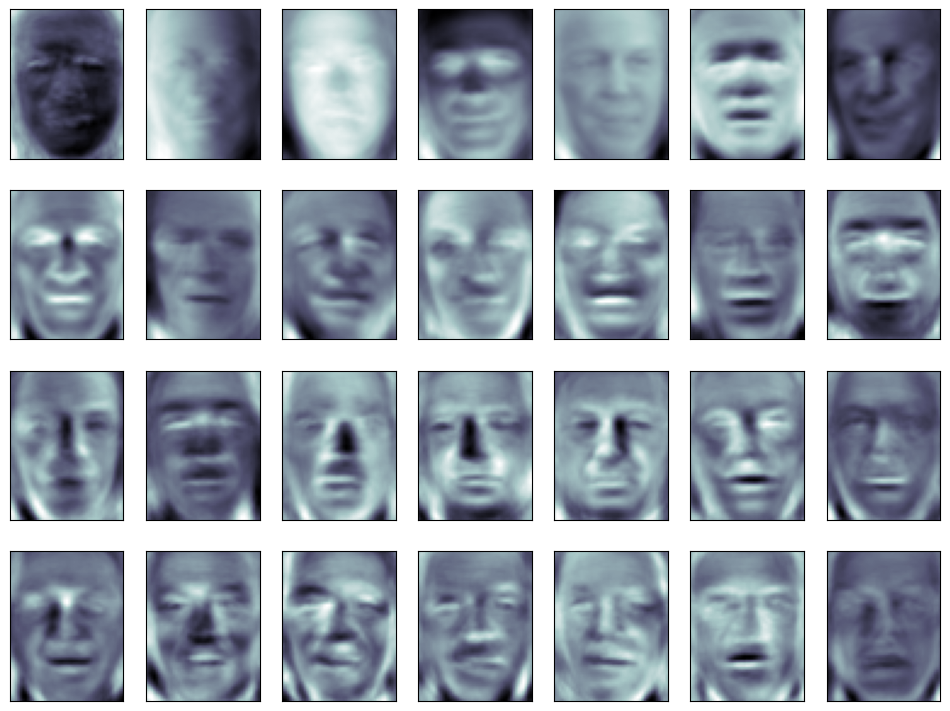

In [1]:

# Load the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=60)

# Compute PCA
n_components = 28
pca = PCA(n_components=n_components, whiten=True)
pca.fit(lfw_people.data)

# Plot the first 28 eigenfaces
eigenfaces = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))

fig, axes = plt.subplots(4, 7, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='bone')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


#Task 2:
Let N be the least number of dimensions to which can you reduce the dataset without exceeding 5% relative error in the Frobenius norm. Find N.

In [2]:
# Compute the full PCA
pca_full = PCA(n_components=min(lfw_people.data.shape))
pca_full.fit(lfw_people.data)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components for 95% total variance
n_components_95 = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1

print(f"Number of components to retain 95% of variance: {n_components_95}")


Number of components to retain 95% of variance: 184


#Task 3:
 Repeat PCA, restricting to N eigenfaces (with N as in Task 2), holding back the last seven images in the dataset. Compute the representations of these last seven images in terms of the N eigenfaces. How do they compare visually with the original seven images

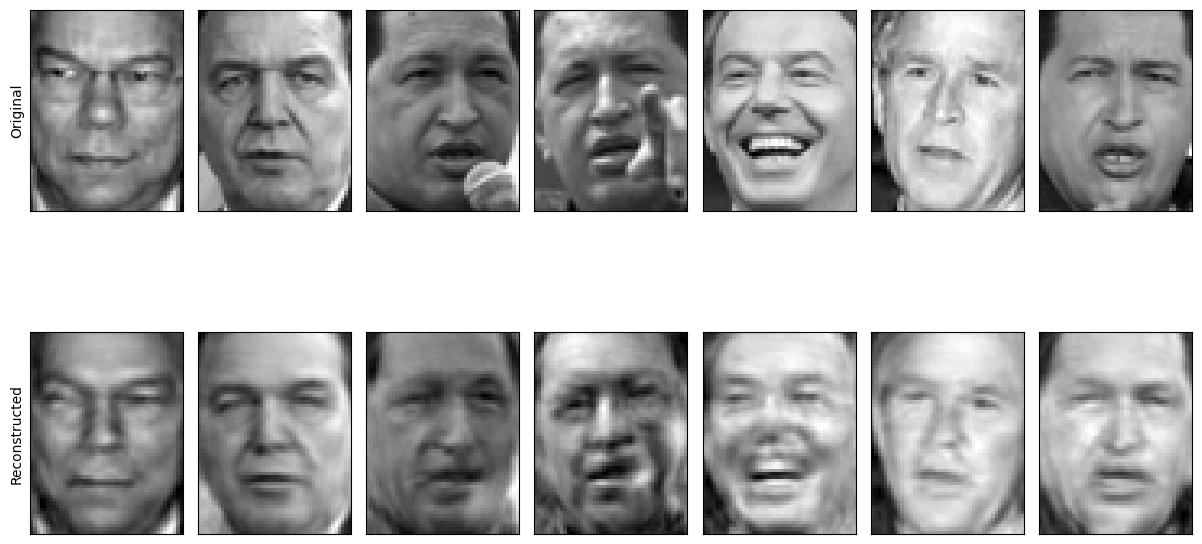

In [3]:
# Separate the last seven images from the dataset
X_train = lfw_people.data[:-7]
X_test = lfw_people.data[-7:]
y_test = lfw_people.target[-7:]

# Fit PCA on all but the last seven images
pca_task3 = PCA(n_components=n_components_95, whiten=True).fit(X_train)

# Transform the data into the PCA space and inverse transform to reconstruct
X_test_pca = pca_task3.transform(X_test)
X_test_reconstructed = pca_task3.inverse_transform(X_test_pca)

# Plot the reconstructed images
fig, axes = plt.subplots(2, 7, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    axes[0, i].imshow(X_test[i].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2]), cmap='gray')
    axes[1, i].imshow(X_test_reconstructed[i].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2]), cmap='gray')
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Reconstructed')
plt.show()


# Task.4

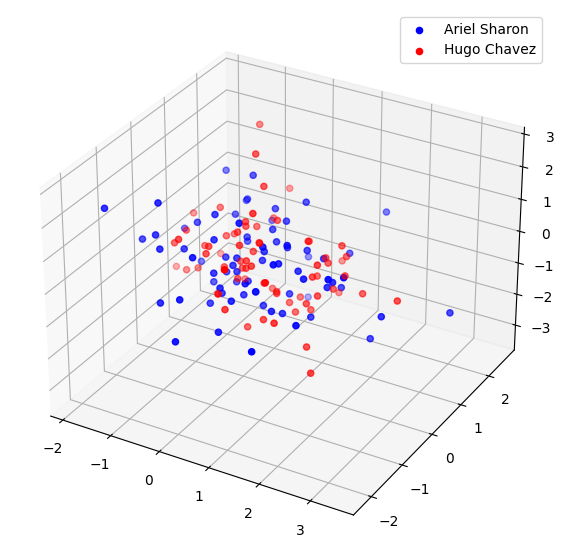

In [4]:
# Get the images of Ariel Sharon and Hugo Chavez
targets = lfw_people.target_names
sharon_idx = np.where(lfw_people.target == np.where(targets == 'Ariel Sharon')[0][0])
chavez_idx = np.where(lfw_people.target == np.where(targets == 'Hugo Chavez')[0][0])

# Fit PCA for 3 components
pca_3d = PCA(n_components=3, whiten=True).fit(X_train)

# Project the images of Ariel Sharon and Hugo Chavez into PCA space
X_sharon_pca = pca_3d.transform(lfw_people.data[sharon_idx])
X_chavez_pca = pca_3d.transform(lfw_people.data[chavez_idx])

# Plot the points in 3D PCA space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sharon_pca[:, 0], X_sharon_pca[:, 1], X_sharon_pca[:, 2], c='blue', label='Ariel Sharon')
ax.scatter(X_chavez_pca[:, 0], X_chavez_pca[:, 1], X_chavez_pca[:, 2], c='red', label='Hugo Chavez')
ax.legend()
plt.show()
